Task 1

Dataset information
attribute:
1.sepal length in cm
2.sepal width in cm
3.petal length in cm
4.petal width in cm
5.classification;iris setosa,versicolour,virginica--output class

import modules

In [2]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#delete column id
df=df.drop(columns=['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#statistics of data 
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#display number of samples in each class
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing of the dataset

In [9]:
#checking id any null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

<Axes: >

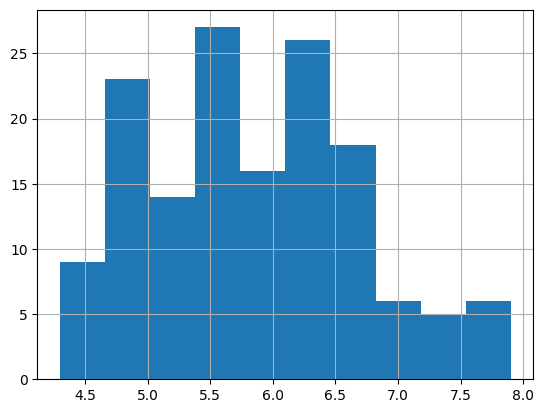

In [10]:
#plotting histograms
df['SepalLengthCm'].hist()
#slightly normal distribution

<Axes: >

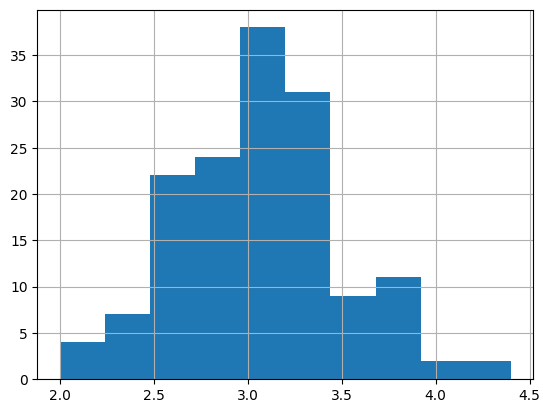

In [11]:
df['SepalWidthCm'].hist()
#normal distribution:no outliers, 1 bell curve

<Axes: >

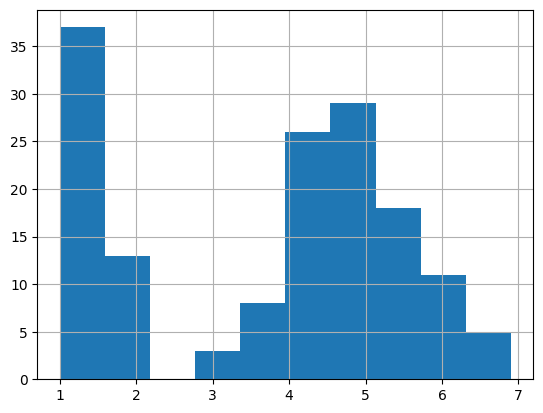

In [12]:
df['PetalLengthCm'].hist()
#non symmetric binomial distribution, two different classes merged together

<Axes: >

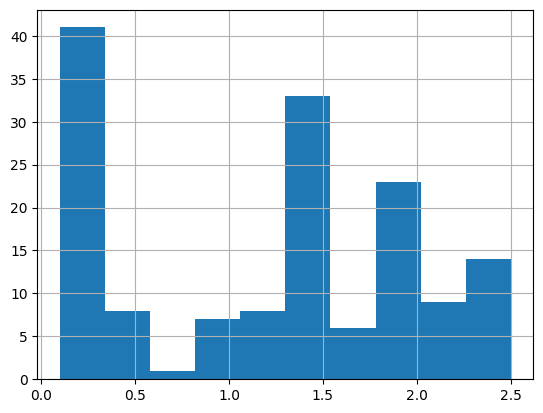

In [13]:
df['PetalWidthCm'].hist()
#non symmetric binomial distribution

Scatter plots

In [14]:
colors=['magenta','pink','maroon']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

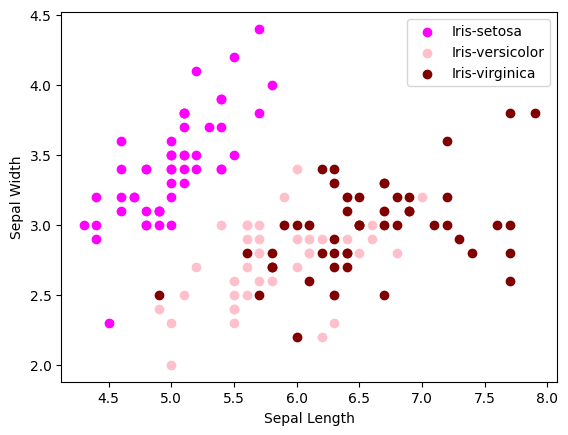

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()    

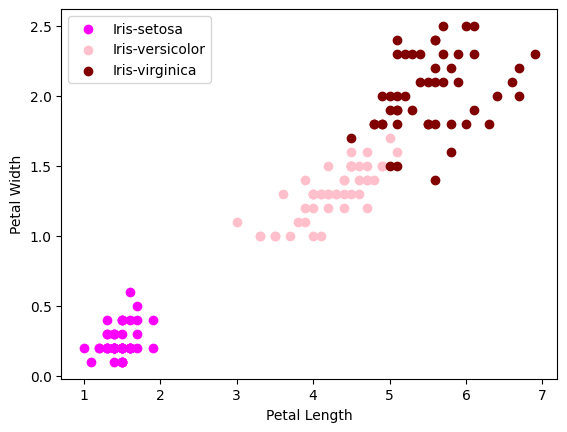

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

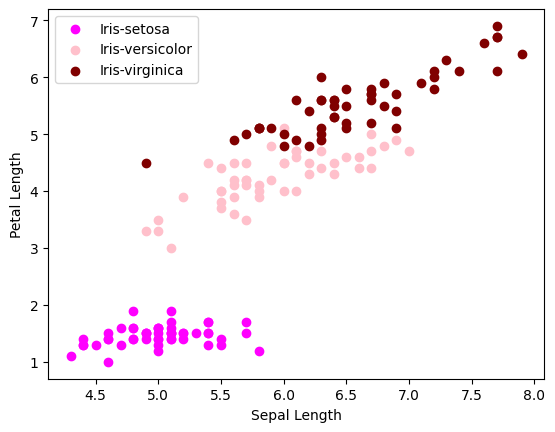

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

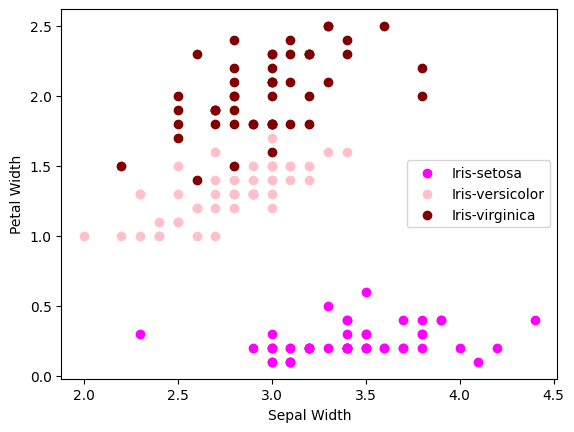

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Coorelation Matrix


In [19]:
selected_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
df_selected = df[selected_columns]

In [20]:
corr_matrix = df_selected.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


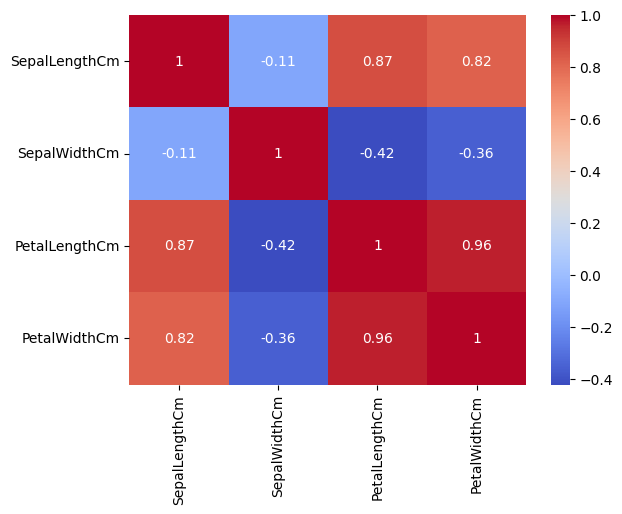

In [21]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
#petallength and petalwidth are high correlated ,so neglect one of them

Label Encoder

In [22]:
#conerting species into numeric values 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
ds=df['Species']
ds

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [24]:
ds=le.fit_transform(ds)
ds


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
df['Species']=ds
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [39]:
from sklearn.model_selection import train_test_split
#train-70% test-30%
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [27]:
# import logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [40]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
93,5.0,2.3,3.3,1.0
73,6.1,2.8,4.7,1.2
133,6.3,2.8,5.1,1.5
123,6.3,2.7,4.9,1.8
112,6.8,3.0,5.5,2.1
...,...,...,...,...
18,5.7,3.8,1.7,0.3
120,6.9,3.2,5.7,2.3
144,6.7,3.3,5.7,2.5
34,4.9,3.1,1.5,0.1


In [41]:
y_train

93     1
73     1
133    2
123    2
112    2
      ..
18     0
120    2
144    2
34     0
4      0
Name: Species, Length: 105, dtype: int32

In [42]:
#model training
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
#print metric to get performance
print("accuracy:",model.score(x_test,y_test))

accuracy: 1.0


In [44]:
#k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [45]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
#print metric to get performance
print("accuracy:",model.score(x_test,y_test))

accuracy: 0.9555555555555556


In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [48]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
#print metric to get performance
print("accuracy:",model.score(x_test,y_test))

accuracy: 0.9777777777777777
